In [116]:
import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVR
import pickle
import os
import joblib
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from pandas.api.types import CategoricalDtype
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
%matplotlib inline

In [31]:
#Importing dataset
data_aus=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
data_ind=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
data_usa=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')

In [32]:
data_aus.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data_ind.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [34]:
data_usa.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df= pd.concat([data_aus,data_ind,data_usa])

In [36]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [37]:
#Checking dimensions of dataset
df.shape

(13298, 27)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [39]:
df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [40]:
df['year_of_capacity_data'].nunique()

1

## Eliminating the columns that have maximum null values as filling these columns will cause data inaccuracy. Also, eliminating the unwanted coulmns

In [41]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel1','other_fuel2','other_fuel3','gppd_idnr','owner','generation_data_source','name','year_of_capacity_data','url'],axis=1,inplace=True)

In [42]:
df

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AUS,Australia,0.11,-34.9387,138.5377,Solar,2011.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,1.00,-34.9453,138.5882,Solar,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,21.60,-35.0641,117.7977,Wind,NaN,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN
3,AUS,Australia,0.24,-23.7966,133.8971,Solar,2004.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,4.00,-34.5509,138.7659,Oil,2015.00000,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,3.40,42.8869,-76.9683,Wind,2012.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211
11875,USA,United States of America,1.00,44.3195,-92.6703,Solar,2018.00000,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,1.161000,1.589
11876,USA,United States of America,0.00,44.0460,-92.7600,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,0.00,39.7373,-105.0170,NaN,NaN,U.S. Energy Information Administration,U.S. Energy Information Administration,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13298 non-null  object 
 1   country_long         13298 non-null  object 
 2   capacity_mw          13292 non-null  float64
 3   latitude             13220 non-null  float64
 4   longitude            13220 non-null  float64
 5   primary_fuel         11294 non-null  object 
 6   commissioning_year   10654 non-null  float64
 7   source               13298 non-null  object 
 8   geolocation_source   13275 non-null  object 
 9   generation_gwh_2013  7170 non-null   float64
 10  generation_gwh_2014  7534 non-null   float64
 11  generation_gwh_2015  7993 non-null   float64
 12  generation_gwh_2016  8701 non-null   float64
 13  generation_gwh_2017  9292 non-null   float64
 14  generation_gwh_2018  9858 non-null   float64
 15  generation_gwh_2019  9778 non-null  

In [44]:
df.isnull().sum()

country                   0
country_long              0
capacity_mw               6
latitude                 78
longitude                78
primary_fuel           2004
commissioning_year     2644
source                    0
geolocation_source       23
generation_gwh_2013    6128
generation_gwh_2014    5764
generation_gwh_2015    5305
generation_gwh_2016    4597
generation_gwh_2017    4006
generation_gwh_2018    3440
generation_gwh_2019    3520
dtype: int64

In [45]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13292.000000,13220.000000,13220.000000,10654.000000,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000
mean,117.738717,35.053213,-73.794217,1998.184904,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
std,347.169038,15.444195,62.868834,24.017781,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305
min,0.000000,-42.888300,-171.712400,1896.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.901700,-104.659875,1988.000000,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250
50%,5.500000,38.389750,-87.346000,2008.000000,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500
75%,52.725000,42.175125,-75.475925,2015.000000,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249
max,6809.000000,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


In [46]:
df['geolocation_source'].unique()

array(['Australian Renewable Energy Mapping Infrastructure',
       'National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About', 'U.S. Energy Information Administration'],
      dtype=object)

In [47]:
#Filling geolocation_source with mode as it is categorical data-
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [49]:
#Filling null values with median in numerical columns-
df.fillna(df.median()[0], inplace=True)

In [50]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000
mean,117.688075,34.879867,-73.329113,1601.985559,306.298819,362.563177,372.933892,369.481915,373.722914,382.220465
std,347.098888,15.563330,62.975959,795.635754,1516.654977,1680.031977,1692.092011,1679.502111,1690.361893,1705.116625
min,0.000000,-42.888300,-171.712400,5.500000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.826475,-104.583400,1954.000000,5.500000,5.500000,5.500000,5.500000,5.034250,4.088500
50%,5.500000,38.330650,-87.104400,2000.295163,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
75%,52.650000,42.166025,-75.291600,2014.000000,27.758750,34.949500,40.148450,45.893500,51.903250,56.527000
max,6809.000000,425.246100,153.434100,2020.000000,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


In [51]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13298 non-null  object 
 1   country_long         13298 non-null  object 
 2   capacity_mw          13298 non-null  float64
 3   latitude             13298 non-null  float64
 4   longitude            13298 non-null  float64
 5   primary_fuel         13298 non-null  object 
 6   commissioning_year   13298 non-null  float64
 7   source               13298 non-null  object 
 8   geolocation_source   13298 non-null  object 
 9   generation_gwh_2013  13298 non-null  float64
 10  generation_gwh_2014  13298 non-null  float64
 11  generation_gwh_2015  13298 non-null  float64
 12  generation_gwh_2016  13298 non-null  float64
 13  generation_gwh_2017  13298 non-null  float64
 14  generation_gwh_2018  13298 non-null  float64
 15  generation_gwh_2019  13298 non-null 

<Axes: xlabel='primary_fuel', ylabel='count'>

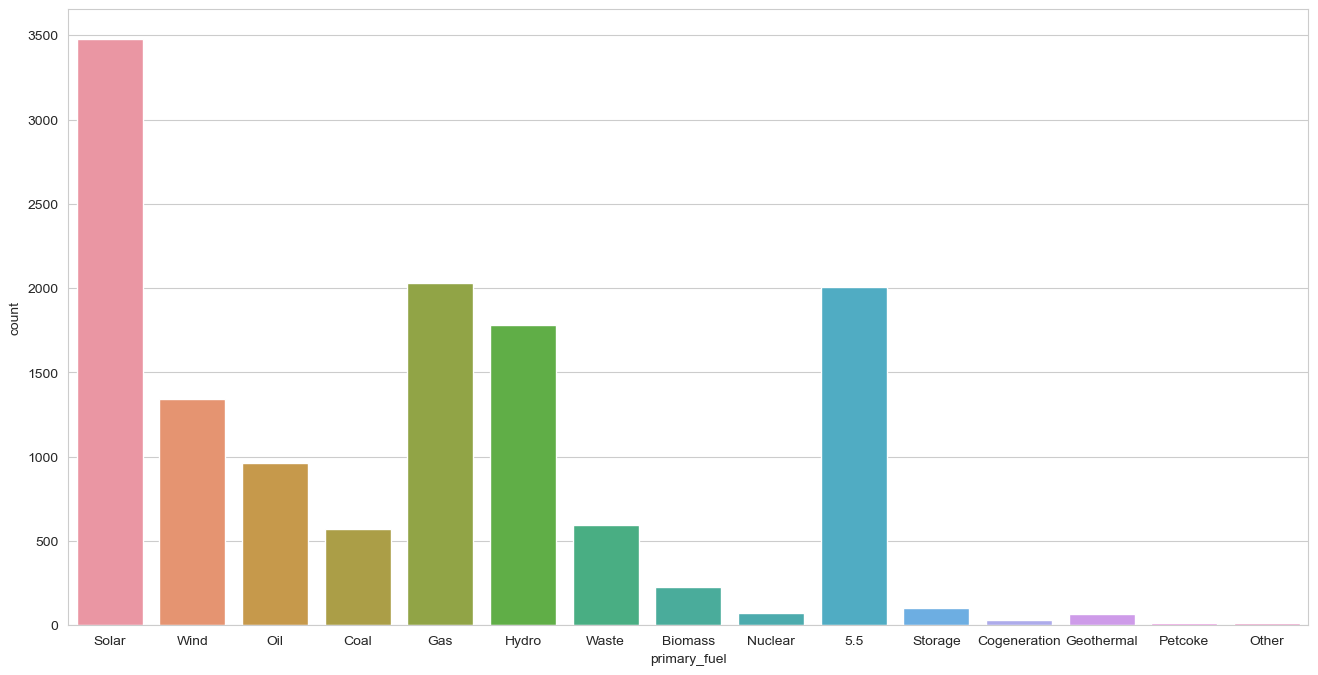

In [72]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

## EDA

In [54]:
df.head()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AUS,Australia,0.11,-34.9387,138.5377,Solar,2011.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.5
1,AUS,Australia,1.00,-34.9453,138.5882,Solar,5.5,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.5
2,AUS,Australia,21.60,-35.0641,117.7977,Wind,5.5,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,5.5
3,AUS,Australia,0.24,-23.7966,133.8971,Solar,2004.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.5
4,AUS,Australia,4.00,-34.5509,138.7659,Oil,2015.0,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000,5.5


In [55]:
dfcorr=df.corr()

<Axes: >

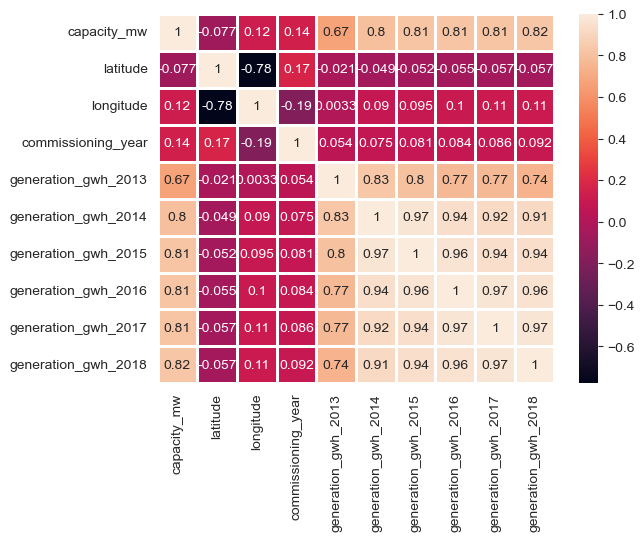

In [56]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

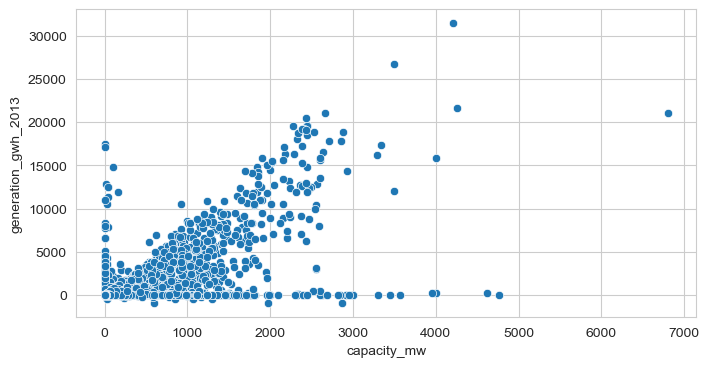

In [57]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

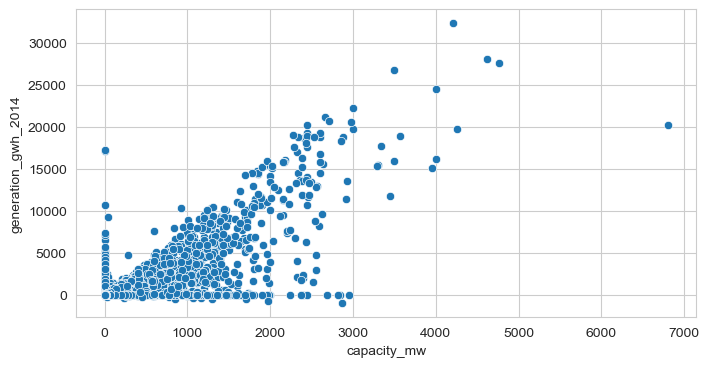

In [58]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

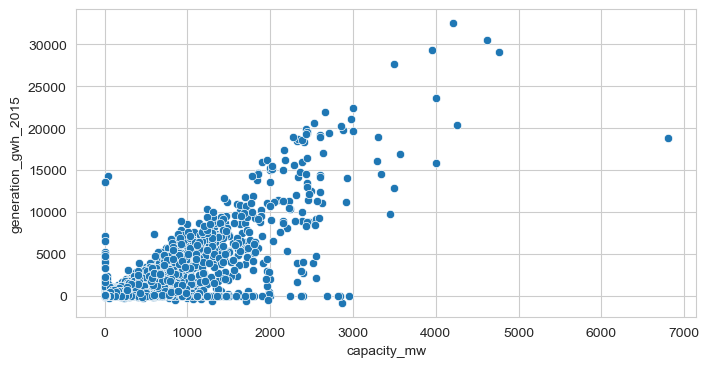

In [59]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

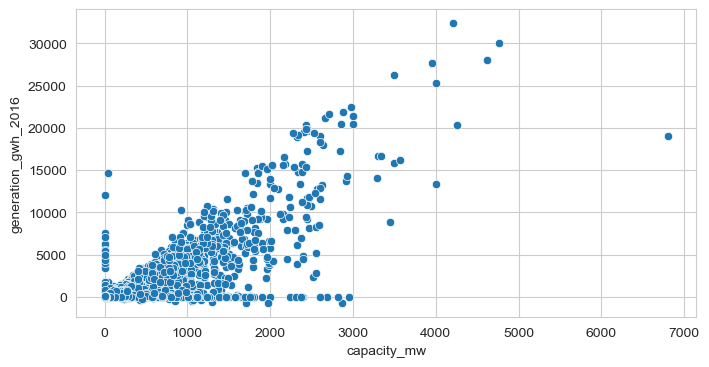

In [60]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2016'>

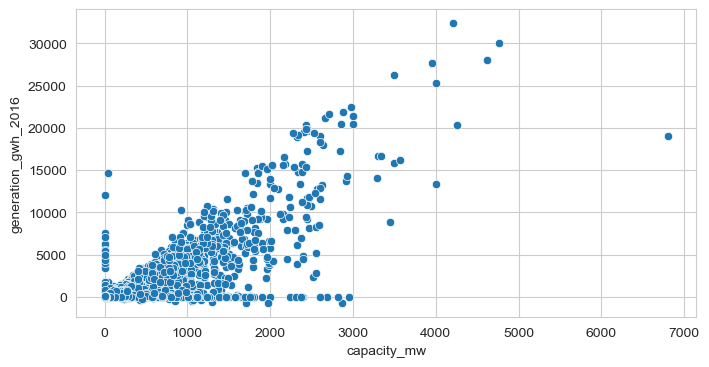

In [61]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

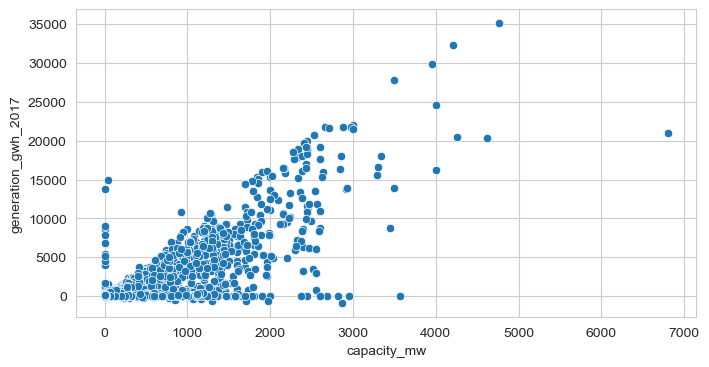

In [62]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

<Axes: xlabel='capacity_mw', ylabel='latitude'>

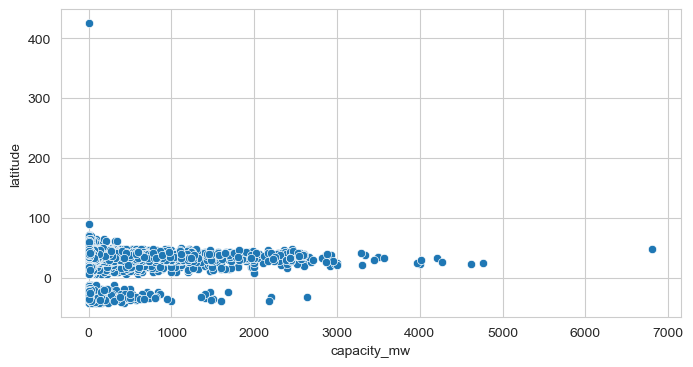

In [63]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

In [66]:
df['primary_fuel'] = df['primary_fuel'].astype(str)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2013'>

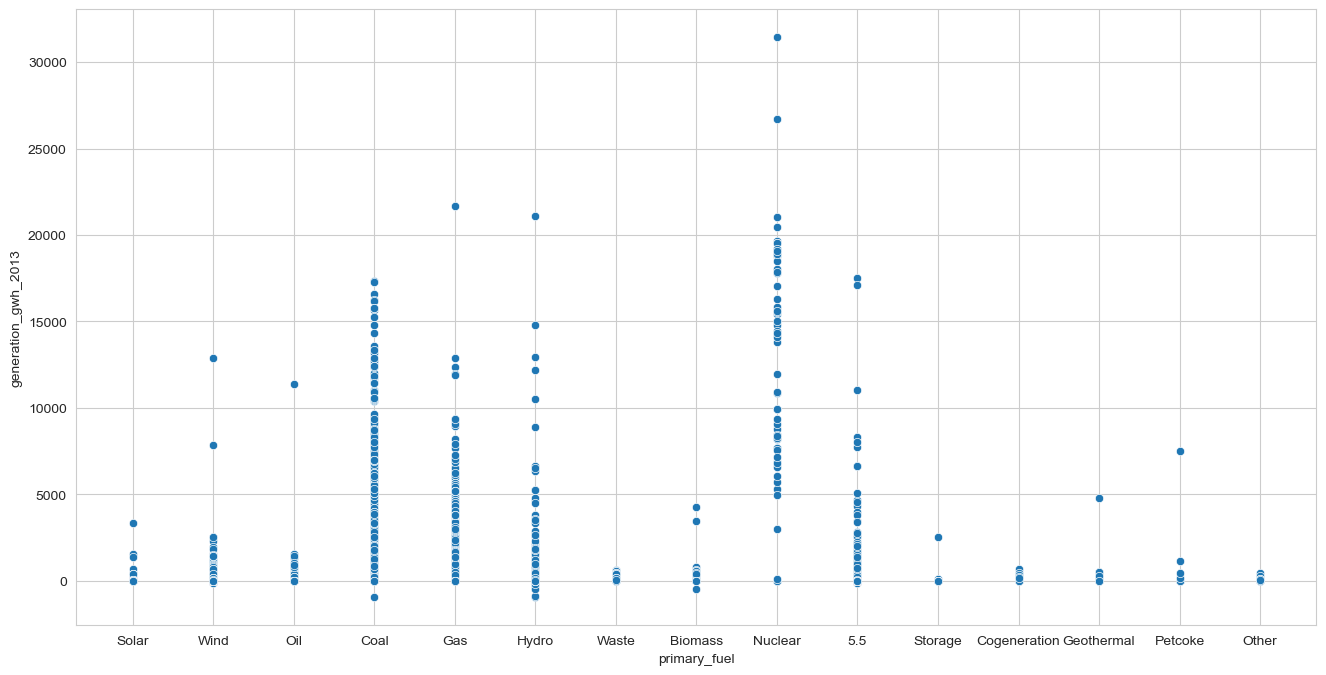

In [74]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2013',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

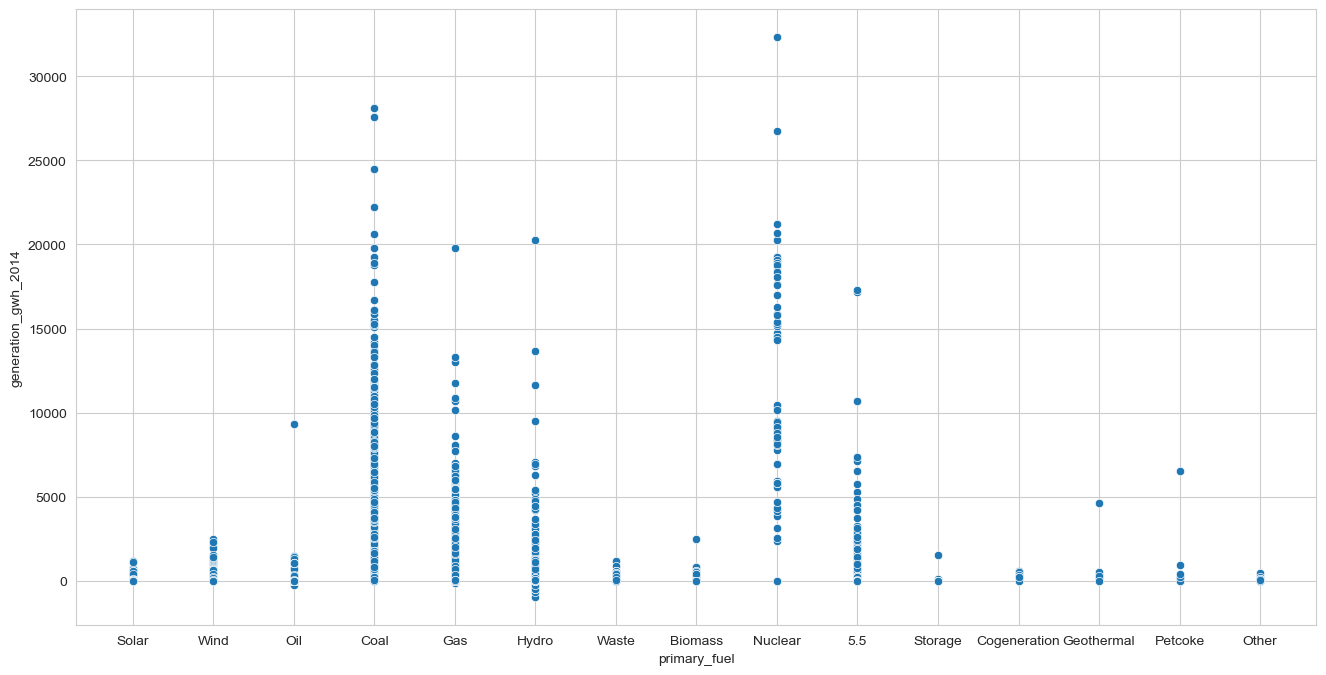

In [75]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

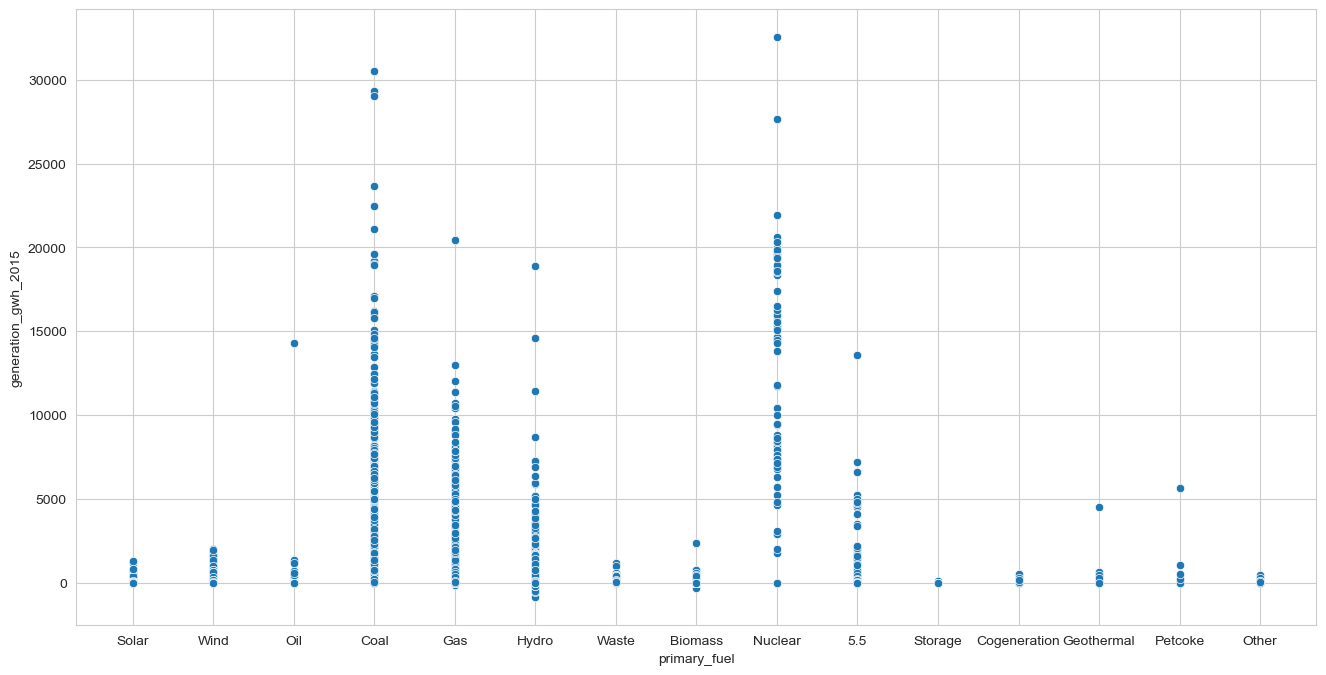

In [76]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

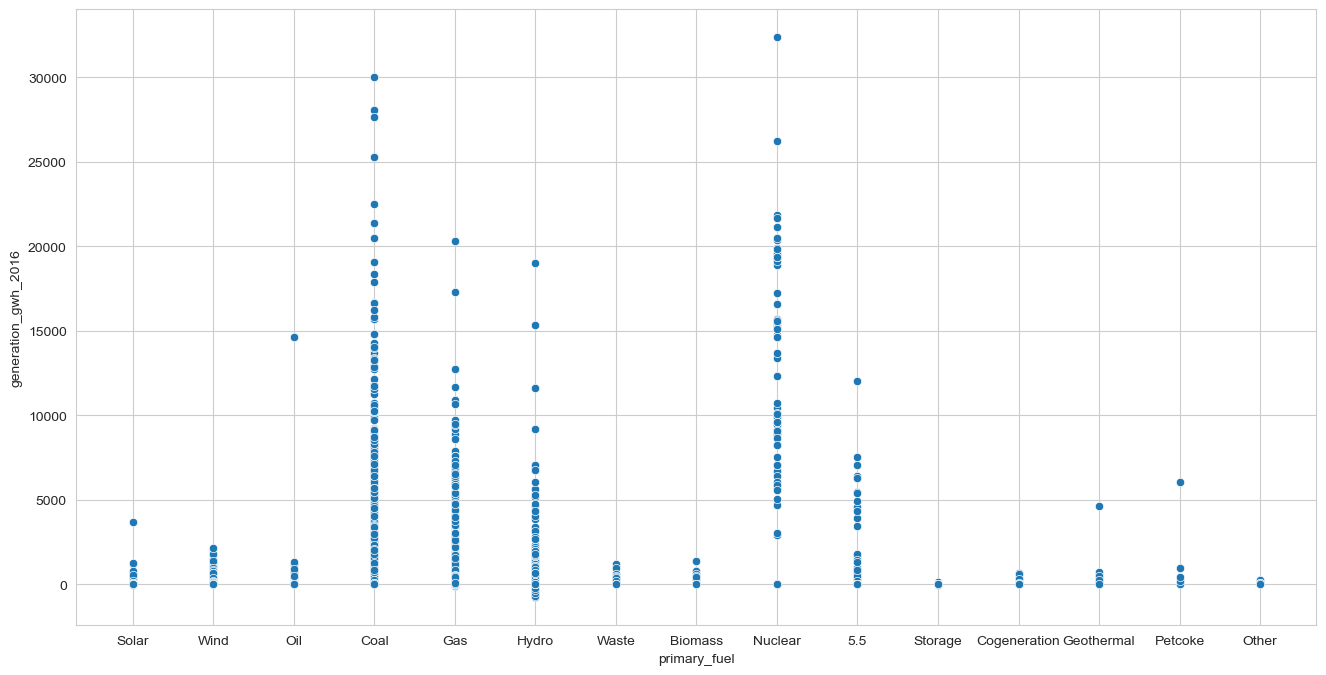

In [77]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

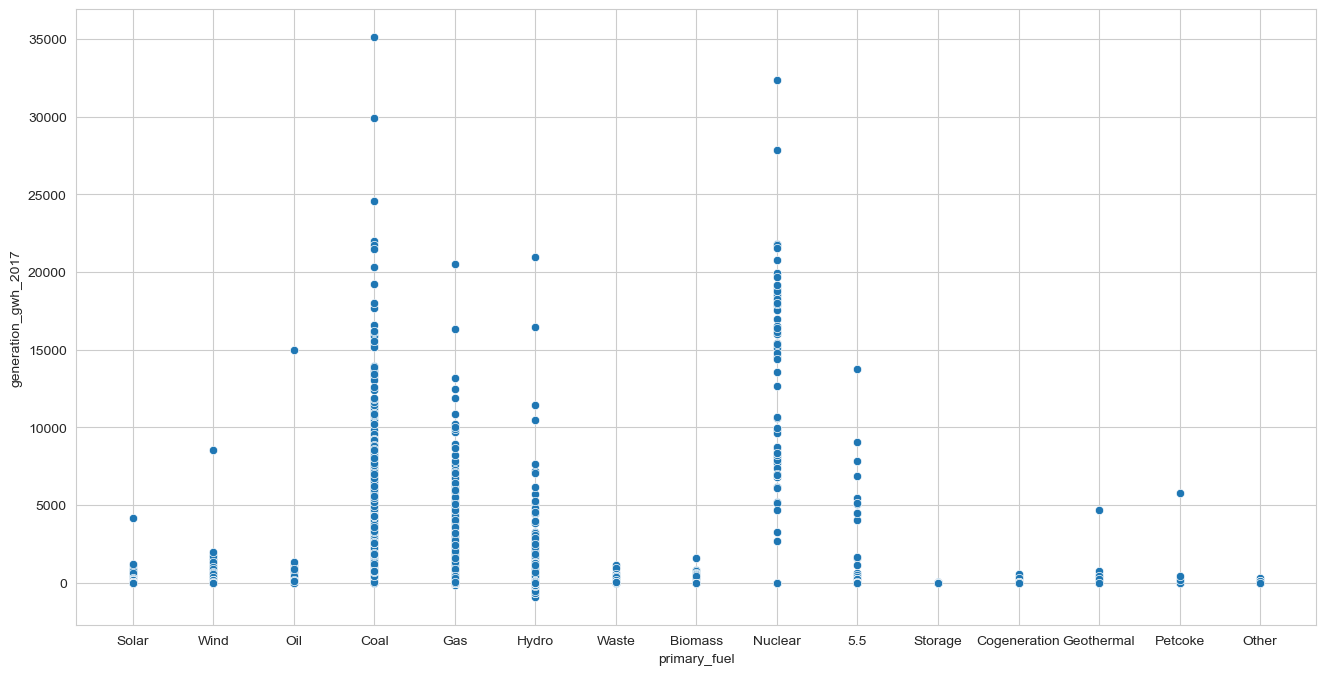

In [78]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<Axes: xlabel='primary_fuel', ylabel='latitude'>

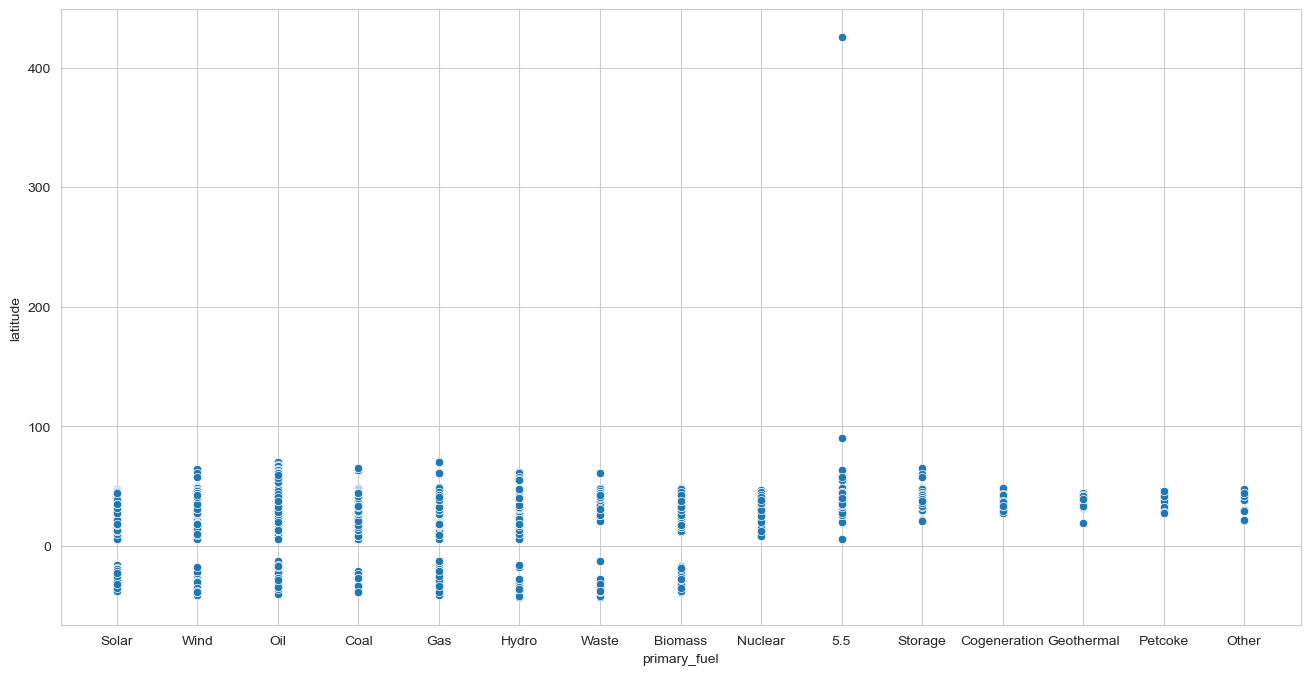

In [79]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<Axes: xlabel='capacity_mw', ylabel='primary_fuel'>

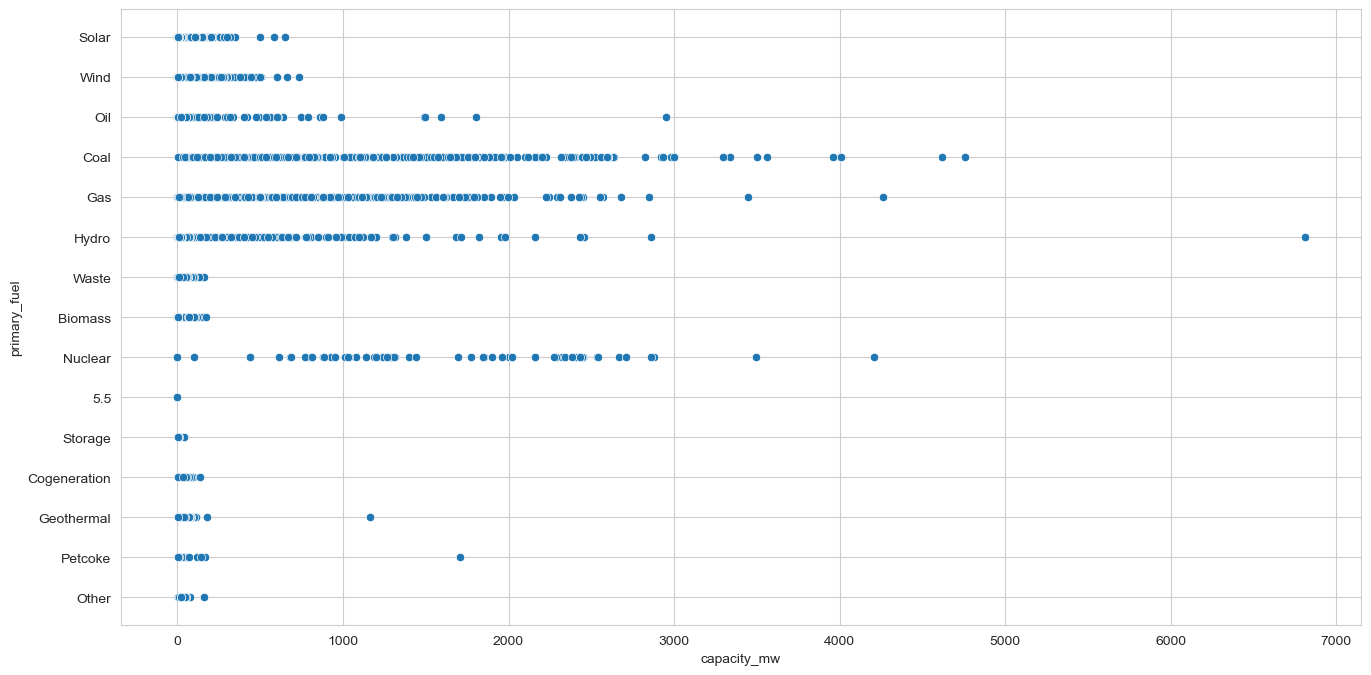

In [80]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

In [ ]:
#Converting categorical column to numerical

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13298 non-null  object 
 1   country_long         13298 non-null  object 
 2   capacity_mw          13298 non-null  float64
 3   latitude             13298 non-null  float64
 4   longitude            13298 non-null  float64
 5   primary_fuel         13298 non-null  object 
 6   commissioning_year   13298 non-null  float64
 7   source               13298 non-null  object 
 8   geolocation_source   13298 non-null  object 
 9   generation_gwh_2013  13298 non-null  float64
 10  generation_gwh_2014  13298 non-null  float64
 11  generation_gwh_2015  13298 non-null  float64
 12  generation_gwh_2016  13298 non-null  float64
 13  generation_gwh_2017  13298 non-null  float64
 14  generation_gwh_2018  13298 non-null  float64
 15  generation_gwh_2019  13298 non-null 

In [82]:
df['primary_fuel'].unique()

array(['Solar', 'Wind', 'Oil', 'Coal', 'Gas', 'Hydro', 'Waste', 'Biomass',
       'Nuclear', '5.5', 'Storage', 'Cogeneration', 'Geothermal',
       'Petcoke', 'Other'], dtype=object)

In [87]:
df['geolocation_source'].unique()

array(['Australian Renewable Energy Mapping Infrastructure',
       'National Renewable Energy Laboratory', 'WRI',
       'U.S. Energy Information Administration', 'Industry About'],
      dtype=object)

In [88]:
from sklearn.preprocessing import LabelEncoder

In [90]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [91]:
df['geolocation_source'].unique()

array([0, 2, 4, 3, 1], dtype=int64)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13298 entries, 0 to 11878
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              13298 non-null  object 
 1   country_long         13298 non-null  object 
 2   capacity_mw          13298 non-null  float64
 3   latitude             13298 non-null  float64
 4   longitude            13298 non-null  float64
 5   primary_fuel         13298 non-null  int64  
 6   commissioning_year   13298 non-null  float64
 7   source               13298 non-null  int64  
 8   geolocation_source   13298 non-null  int64  
 9   generation_gwh_2013  13298 non-null  float64
 10  generation_gwh_2014  13298 non-null  float64
 11  generation_gwh_2015  13298 non-null  float64
 12  generation_gwh_2016  13298 non-null  float64
 13  generation_gwh_2017  13298 non-null  float64
 14  generation_gwh_2018  13298 non-null  float64
 15  generation_gwh_2019  13298 non-null 

In [94]:
#Outlier Removal

In [95]:
from scipy.stats import zscore

In [96]:
z=np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([   22,    22,    22, ..., 13146, 13150, 13265], dtype=int64), array([0, 1, 2, ..., 5, 5, 5], dtype=int64))


In [97]:
z = np.abs(zscore(df[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (13298, 16)
Shape of the dataframe after removing outliers:  (12842, 16)
Percentage of data loss post outlier removal:  3.429087080764025


In [98]:
 # reassigning the changed dataframe name to our original dataframe name
df=df1.copy()


In [99]:
df.shape

(12842, 16)

In [ ]:
#Skewness handling

In [103]:
df.skew()

capacity_mw            3.671705
latitude              -1.793951
longitude              2.374991
primary_fuel          -0.185306
commissioning_year    -1.467063
source                -2.837613
geolocation_source    -3.375620
generation_gwh_2013    6.080026
generation_gwh_2014    5.701397
generation_gwh_2015    5.733371
generation_gwh_2016    5.855214
generation_gwh_2017    5.777285
generation_gwh_2018    5.708958
dtype: float64

In [104]:
from sklearn.preprocessing import power_transform

In [118]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])
df.skew()

capacity_mw            0.011596
latitude              -1.793951
longitude              2.374991
primary_fuel          -0.185306
commissioning_year    -1.467063
source                -2.837613
geolocation_source    -3.375620
generation_gwh_2013   -6.717935
generation_gwh_2014   -4.373804
generation_gwh_2015   -4.650107
generation_gwh_2016   -4.399935
generation_gwh_2017   -4.962278
generation_gwh_2018    5.708958
dtype: float64

In [120]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [106]:
#Dividing data into X and Y-

In [121]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [122]:
x.shape

(12842, 13)

In [123]:
y.shape

(12842,)